### Lista Prática 4 - Pablo Corrêa Fonseca

**1. Importe para o R os dados do arquivo “dados_03.csv” e converta as variáveis YIG,
YIGD, IBCBR, IBCBRD, IPCA e TJ para séries de tempo usando o comando “ts”. [Obs.:
YIG = produção física industrial; YIGD = produção física industrial dessazonalizada; IPCA
= índice do IPCA; TJ = taxa Selic; IBCBR = índice de atividade do BCB].**

In [4]:
library('xts')
df = read.csv2('dados03.csv', sep=";", dec=",")
datas = seq(as.Date("2003-01-01"),length=nrow(df),by="months")
df = xts(df[0:-1], datas)
head(df)

               TJ    IPCA  IBCBR IBCBRD  YIG YIGD
2003-01-01 1.9713 2085.68  96.15 100.44 74.0 79.3
2003-02-01 1.8304 2118.43  98.67 101.83 71.8 79.5
2003-03-01 1.7770 2144.49 103.41 102.17 77.4 79.5
2003-04-01 1.8716 2165.29 102.19 101.43 76.5 79.2
2003-05-01 1.9654 2178.50 100.30  99.67 79.7 77.9
2003-06-01 1.8567 2175.23  98.58 100.39 76.3 78.0

**2 . Crie a variável “taxa de juros mensal real (ex-post)”, por meio do comando:
“tjr=((1+tj/100)/(ipca/lag(ipca,-1))-1)*100”. Realize o teste ADF para esta variável, nas
especificações com constante e com constante+tendência. O PGD possui raiz unitária?
Parece estacionário ou não estacionário?**

In [6]:
df$TJR=((1+df$TJ/100)/(df$IPCA/lag(df$IPCA,-1))-1)*100
head(df)
library('urca')
t1 = ur.df(y=na.omit(df$TJR), type='drift', selectlags='BIC')
t1@model
t1@teststat
t1@cval

t2 = ur.df(y=na.omit(df$TJR), type='trend', selectlags='BIC')
t2@model
t2@teststat
t2@cval

               TJ    IPCA  IBCBR IBCBRD  YIG YIGD      TJR
2003-01-01 1.9713 2085.68  96.15 100.44 74.0 79.3 3.572485
2003-02-01 1.8304 2118.43  98.67 101.83 71.8 79.5 3.083073
2003-03-01 1.7770 2144.49 103.41 102.17 77.4 79.5 2.764163
2003-04-01 1.8716 2165.29 102.19 101.43 76.5 79.2 2.493098
2003-05-01 1.9654 2178.50 100.30  99.67 79.7 77.9 1.812347
2003-06-01 1.8567 2175.23  98.58 100.39 76.3 78.0 2.060392

[1] "drift"

,tau2,phi1
statistic,-4.855875,12.10422


,1pct,5pct,10pct
tau2,-3.46,-2.88,-2.57
phi1,6.52,4.63,3.81


[1] "trend"

,tau3,phi2,phi3
statistic,-4.98501,8.672161,12.69247


,1pct,5pct,10pct
tau3,-3.99,-3.43,-3.13
phi2,6.22,4.75,4.07
phi3,8.43,6.49,5.47


tanto no teste drift, quanto no trend, rejeitamos a hipótese nula de que há raízes unitárias, e o PGD de TJR parece ser estacionário em torno de uma tendência

**3 . Estime a regressão de tjr em uma constante e uma tendência linear. Apresente um
gráfico com a série original e a ajustada, e outro gráfico com o resíduo da regressão.
Qual poderia ser a interpretação econômica da variável ajustada da regressão? E do
resíduo?**

In [7]:
r1 = lm(formula = coredata(df$TJR) ~ seq_along(df$TJR))
r1


Call:
lm(formula = coredata(df$TJR) ~ seq_along(df$TJR))

Coefficients:
      (Intercept)  seq_along(df$TJR)  
         1.823226          -0.003501  


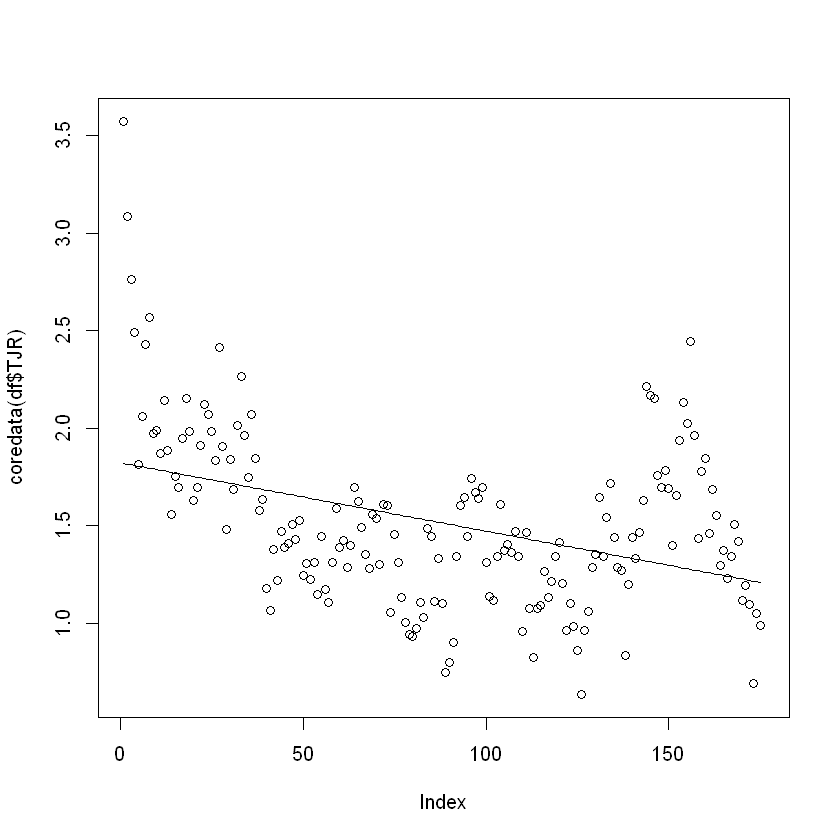

In [8]:
plot(coredata(df$TJR))
lines(fitted.values(r1))

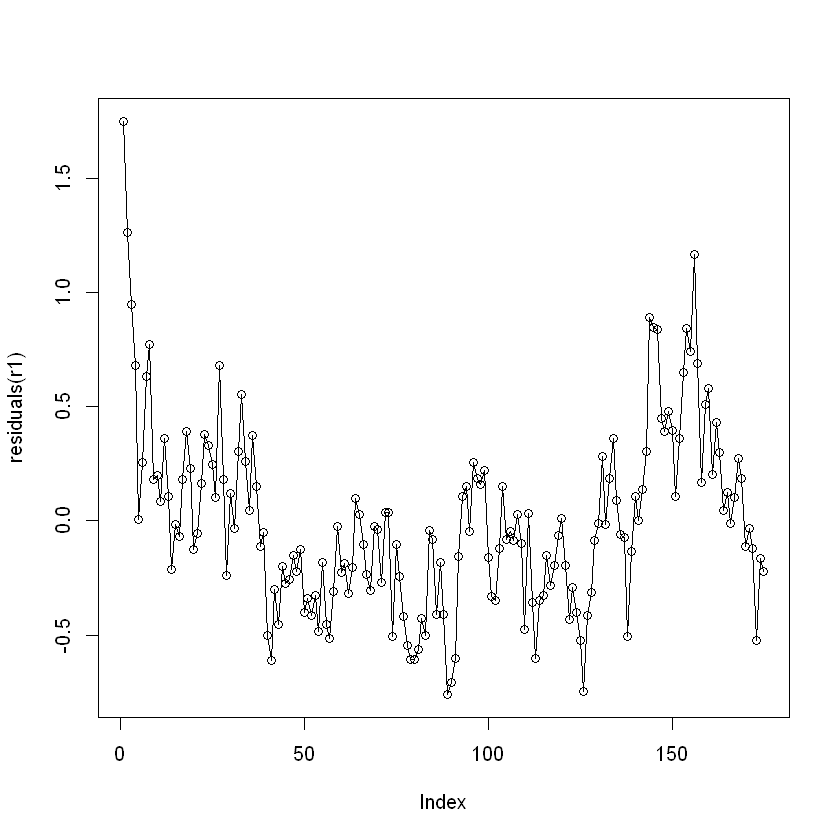

In [9]:
plot(residuals(r1), type='o')

A interpretação econômica da variável ajustada da regressão é a tendência de queda da taxa de juros real para o período. O resíduo da regressão mostra a variação devido a outros fatores que não a tendência linear de queda

**4 . Estime agora a regressão de tjr em uma constante e uma variável “dummy de degrau”,
com valor 0 até 2006.12 e valor 1 dali em diante. Apresente um gráfico com a série **

In [10]:
df$DUMMY_DEGRAU = 1
df[index(df) <= '2006-12-01','DUMMY_DEGRAU'] = 0
r2 = lm(formula = coredata(df$TJR) ~ coredata(df$DUMMY_DEGRAU))
r2


Call:
lm(formula = coredata(df$TJR) ~ coredata(df$DUMMY_DEGRAU))

Coefficients:
              (Intercept)  coredata(df$DUMMY_DEGRAU)  
                   1.9059                    -0.5385  


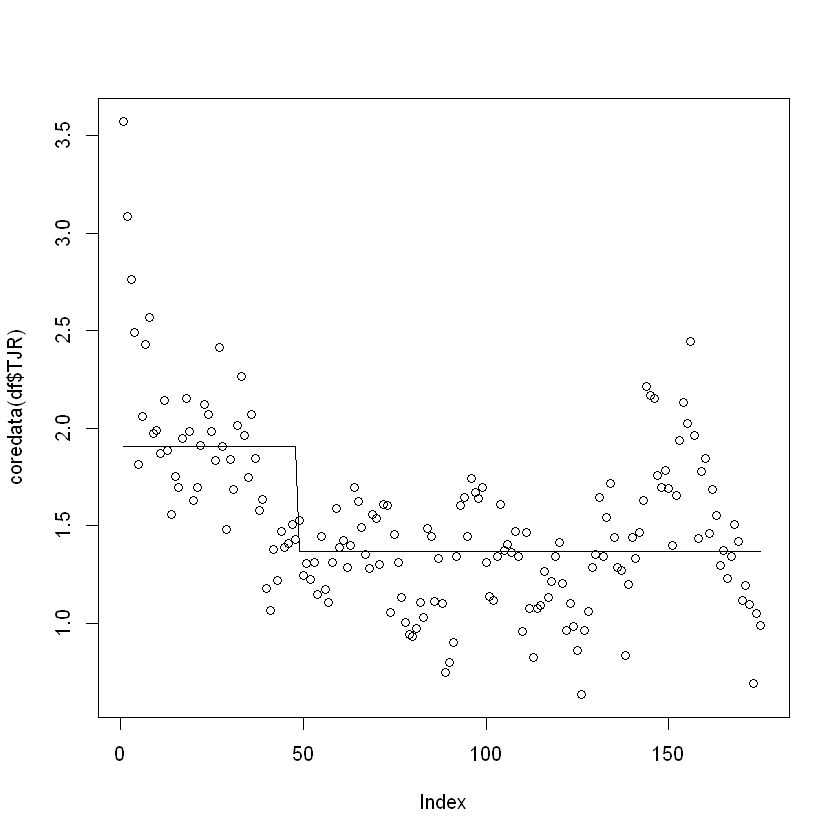

In [11]:
plot(coredata(df$TJR))
lines(fitted.values(r2))

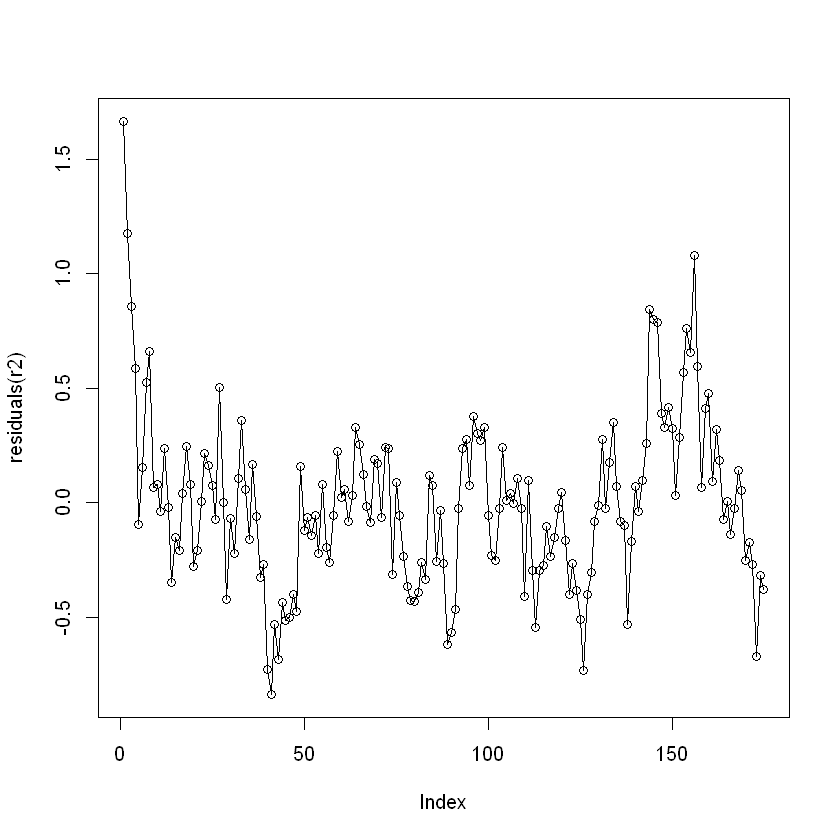

In [12]:
plot(residuals(r2), type='o')

**5 . Aplique o filtro HP à série tjr, usando o valor padrão de “lambda”. Salve os resultados.
Em seguida, repita a operação com “lambda=10000”. Salve os resultados**

In [14]:
library('mFilter')
hp1 = hpfilter(na.omit(df$TJR), freq=14400)
hp2 = hpfilter(na.omit(df$TJR), freq=10000)

** 6. Apresente em um gráfico as variáveis ajustadas obtidas nos itens 3, 4 e 5 acima (aregressão
em tendência determinística; b- regressão em dummy; c- HP padrão; d- HP
com lambda menor). Comente as diferenças e semelhanças. Qual procedimento você
julga mais adequado para captar o componente tendencial da tjr?  **

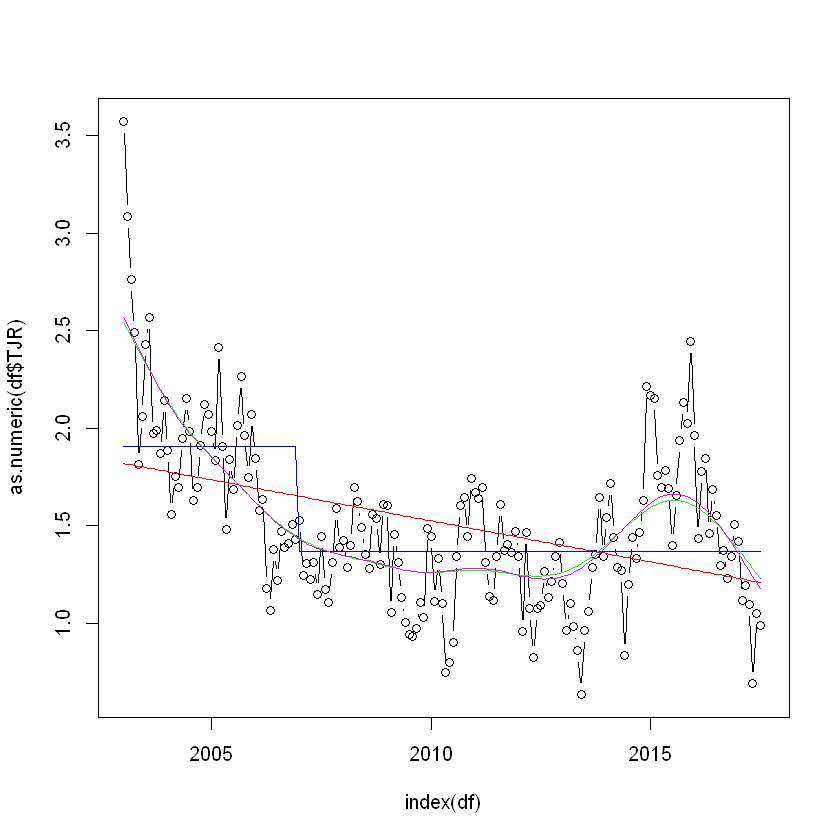

In [15]:
plot(y=as.numeric(df$TJR), x = index(df), type='b')
lines(y=fitted(r1),  x = index(na.omit(df)), col='red')
lines(y=fitted(r2),  x = index(na.omit(df)), col='blue')
lines(y=as.numeric(hp1$trend),  x = index(na.omit(df)), col='green')
lines(y=as.numeric(hp2$trend),  x = index(na.omit(df)), col='magenta')

a <span style="color:red;">primeira regressão</span> captura a tendencia como linear e constante ao longo do período, a <span style="color:blue;">segunda</span> captura a tendência como constante em dois períodos distintos com uma quebra estrutural entre eles. Tanto o <span style="color:green;">filtro hp com lambda = 14400</span> quanto o <span style="color:magenta;">filtro hp com lambda = 10000</span> se ajustam aos dados de forma parecida, com sendo o com lambda maior menos volátil.

Em todos os casos há uma arbitrariedade por conta da especificações dos parâmetros (ponto de quebra na segunda regressão, lambdas nos filtros hp, e a primeira regressão pode ser vista como um caso do filtro hp com  $ \lambda \to \infty $).

Um filtro HP com lambda elevado parece ser mais adequado para capturar a tendência.

** 7 . Compare graficamente, agora, os componentes cíclicos estimados sob os
procedimentos: a-tend.determinística; c-HP padrão. Comente. **


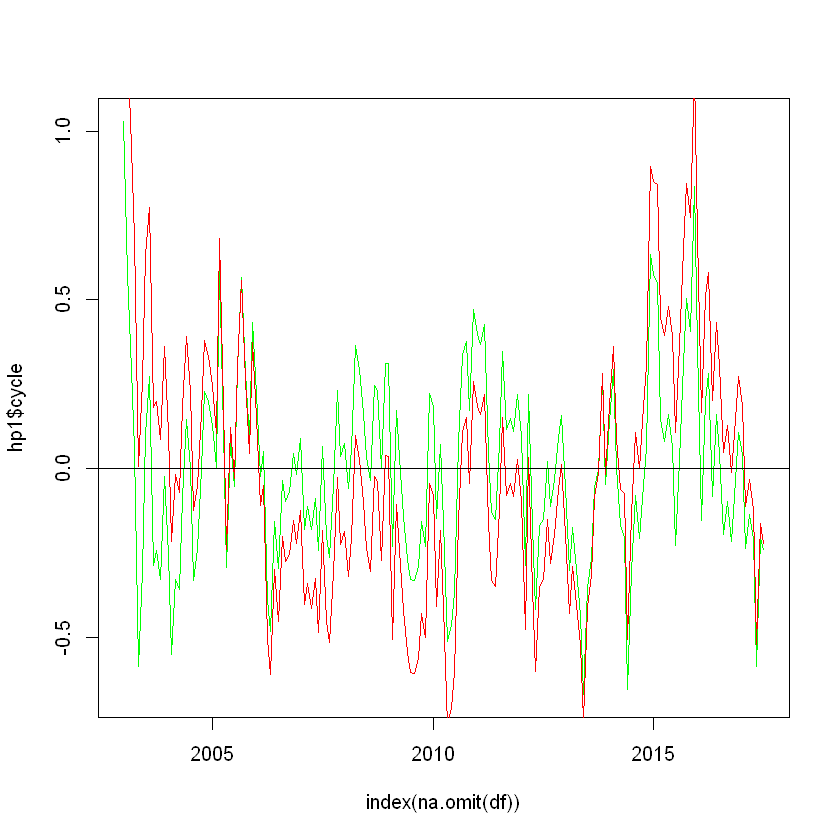

In [16]:
plot(hp1$cycle, x=index(na.omit(df)), type='l', col='green')
lines(r1$residuals, x=index(na.omit(df)), col='red')
abline(0,0)

nota-se que os desvios cíclicos são menores (mais próximos de zero) no procedimento HP Padrão

**8 . Estime uma regressão da primeira diferença logarítimica de YIGD na tjr (e uma
constante). Analise os resultados. A tjr parece afetar o produto industrial
significativamente? **


In [17]:
df$d_yigd = diff(log(df$YIGD))

In [18]:
summary(lm(d_yigd ~ 1 + TJR, data = data.frame(df)))


Call:
lm(formula = d_yigd ~ 1 + TJR, data = data.frame(df))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.136664 -0.007871  0.002428  0.009475  0.058166 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.004987   0.005273   0.946    0.346
TJR         -0.002932   0.003382  -0.867    0.387

Residual standard error: 0.01841 on 172 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.004351,	Adjusted R-squared:  -0.001438 
F-statistic: 0.7516 on 1 and 172 DF,  p-value: 0.3872


não parece haver relação estatisticamente significativa entre a primeira diferença logarítimica de YIGD e tjr.

** 9 . Estime agora a regressão da primeira diferença logarítimica de YIGD no ciclo da tjr
estimado pelo método (a- tendência determinística). Compare os resultados aos
obtidos no item anterior. **

In [19]:
summary(lm(d_yigd ~ ciclo_a, data=data.frame(ciclo_a=residuals(r1), na.omit(df$d_yigd))))


Call:
lm(formula = d_yigd ~ ciclo_a, data = data.frame(ciclo_a = residuals(r1), 
    na.omit(df$d_yigd)))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.138103 -0.008212  0.001966  0.009649  0.058366 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.0005361  0.0013850   0.387    0.699
ciclo_a     -0.0043114  0.0034373  -1.254    0.211

Residual standard error: 0.01832 on 173 degrees of freedom
Multiple R-squared:  0.009012,	Adjusted R-squared:  0.003284 
F-statistic: 1.573 on 1 and 173 DF,  p-value: 0.2114


Em linha com os resultados do item anterior, não parece haver significância estatística na relação entre a primeira diferença logarítimica de YIGD e o ciclo da tjr

** 10 . Estime agora a regressão da primeira diferença logarítimica de YIGD no ciclo da tjr
estimado pelo método (c- filtro HP). Compare os resultados aos obtidos nos itens
anteriores. **

In [20]:
summary(lm(d_yigd ~ ciclo_c, data=data.frame(ciclo_c=hp1$cycle, na.omit(df$d_yigd))))


Call:
lm(formula = d_yigd ~ ciclo_c, data = data.frame(ciclo_c = hp1$cycle, 
    na.omit(df$d_yigd)))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.136930 -0.007810  0.002201  0.009704  0.060039 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.0005361  0.0013851   0.387    0.699
ciclo_c     -0.0061135  0.0048975  -1.248    0.214

Residual standard error: 0.01832 on 173 degrees of freedom
Multiple R-squared:  0.008927,	Adjusted R-squared:  0.003198 
F-statistic: 1.558 on 1 and 173 DF,  p-value: 0.2136


mais uma vez, em linha com os resultados anteriores, não a evidência estatística de relação entre as variáveis.

**11 . Aplique o filtro HP à série YIGD em logaritmo, usando o valor padrão de “lambda”. Em
seguida, estime a regressão do ciclo de YIGD assim obtido no ciclo da tjr estimado pelo
método (c- filtro HP). Compare os resultados aos obtidos nos itens anteriores**

In [21]:
data=data.frame(ciclo_c=hp1$cycle, hp_d_yigd=hpfilter(na.omit(df$d_yigd), freq=14400)$cycle)
summary(lm(hp_d_yigd ~ 1 + ciclo_c, data=data))


Call:
lm(formula = hp_d_yigd ~ 1 + ciclo_c, data = data)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.136939 -0.007938  0.002354  0.009276  0.059629 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)
(Intercept)  1.105e-18  1.361e-03   0.000    1.000
ciclo_c     -4.824e-03  4.812e-03  -1.003    0.317

Residual standard error: 0.018 on 173 degrees of freedom
Multiple R-squared:  0.005776,	Adjusted R-squared:  2.924e-05 
F-statistic: 1.005 on 1 and 173 DF,  p-value: 0.3175


nota se uma redução acentuada do erro padrão.

**13 . Simule um processo ruído branco de tamanho 300 e analise sua FAC e FACP. Em
seguida, aplique o filtro HP à série gerada e analise o par FAC/FACP do componente
cíclico desta série. Compare com o par FAC/FACP da série original. Repita o
procedimento algumas vezes. Os resultados obtidos sugerem alguma cautela no uso
do filtro HP (e outros métodos de “suavização”)?**

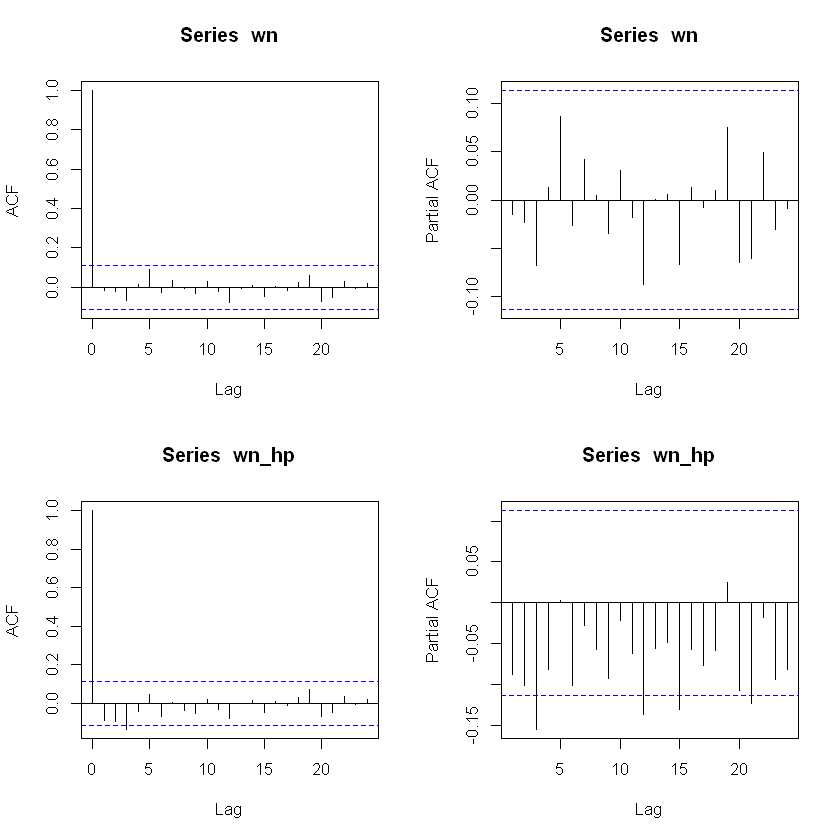

In [22]:
wn = rnorm(300)
wn_hp = hpfilter(wn, freq=1600)$cycle
par(mfrow=c(2,2))
acf(wn)
pacf(wn)
acf(wn_hp)
pacf(wn_hp)

Os resultados sugerem que o uso de métodos de suavização podem introduzir autocorrelação entre as variáveis.